In [1]:
## Importing Packages

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import os

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [3]:
os.getcwd()

'C:\\Users\\SUNITA'

In [4]:
## Change directory
os.chdir("F:\\STOCKMRKT_PROJ")

In [5]:
## Read the CSV file from Pandas

In [6]:
stock_df=pd.read_csv("GOOG_StockData.csv",na_values=[""," ","N/A","NA"])

In [7]:
# Make a copy of the original sourcefile
stock_df1 = stock_df.copy()

In [8]:
## Data Decription and Exploratory Visualisation

In [9]:
# Dataset columns
stock_df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
# Dataset header
stock_df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/29/2015,597.280029,605.000000,590.219971,594.969971,594.969971,2309500
1,9/30/2015,603.280029,608.760010,600.729980,608.419983,608.419983,2413400
2,10/1/2015,608.369995,612.090027,599.849976,611.289978,611.289978,1867600
3,10/2/2015,607.200012,627.340027,603.130005,626.909973,626.909973,2684800
4,10/5/2015,632.000000,643.010010,627.000000,641.469971,641.469971,1803600


In [11]:
stock_df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,9/22/2020,1450.089966,1469.520020,1434.530029,1465.459961,1465.459961,1583200
1255,9/23/2020,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1657400
1256,9/24/2020,1411.030029,1443.708984,1409.849976,1428.290039,1428.290039,1450200
1257,9/25/2020,1432.630005,1450.000000,1413.339966,1444.959961,1444.959961,1323000
1258,9/28/2020,1474.209961,1476.800049,1449.301147,1464.520020,1464.520020,1676914


In [12]:
## Find missing values if any
stock_df1.isnull().values.any()

False

In [13]:
stock_df1.columns.to_series().groupby(stock_df1.dtypes).groups

{dtype('int64'): Index(['Volume'], dtype='object'),
 dtype('float64'): Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object'),
 dtype('O'): Index(['Date'], dtype='object')}

In [14]:
# Columns datatypes and missign values
stock_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [15]:
## Numerical features overview

In [16]:
stock_df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1038.785647,1048.701819,1029.154337,1039.409947,1039.409947,1.689420e+06
std,241.174252,244.727230,238.153898,241.626692,241.626692,7.777893e+05
min,597.280029,605.000000,590.219971,594.969971,594.969971,3.475000e+05
25%,797.370025,802.850006,793.095002,796.879975,796.879975,1.213200e+06
50%,1055.089966,1067.000000,1044.087036,1054.790039,1054.790039,1.487400e+06
75%,1195.200012,1203.832519,1185.104981,1194.975037,1194.975037,1.930950e+06
max,1709.713989,1733.180054,1666.329956,1728.280029,1728.280029,6.653900e+06


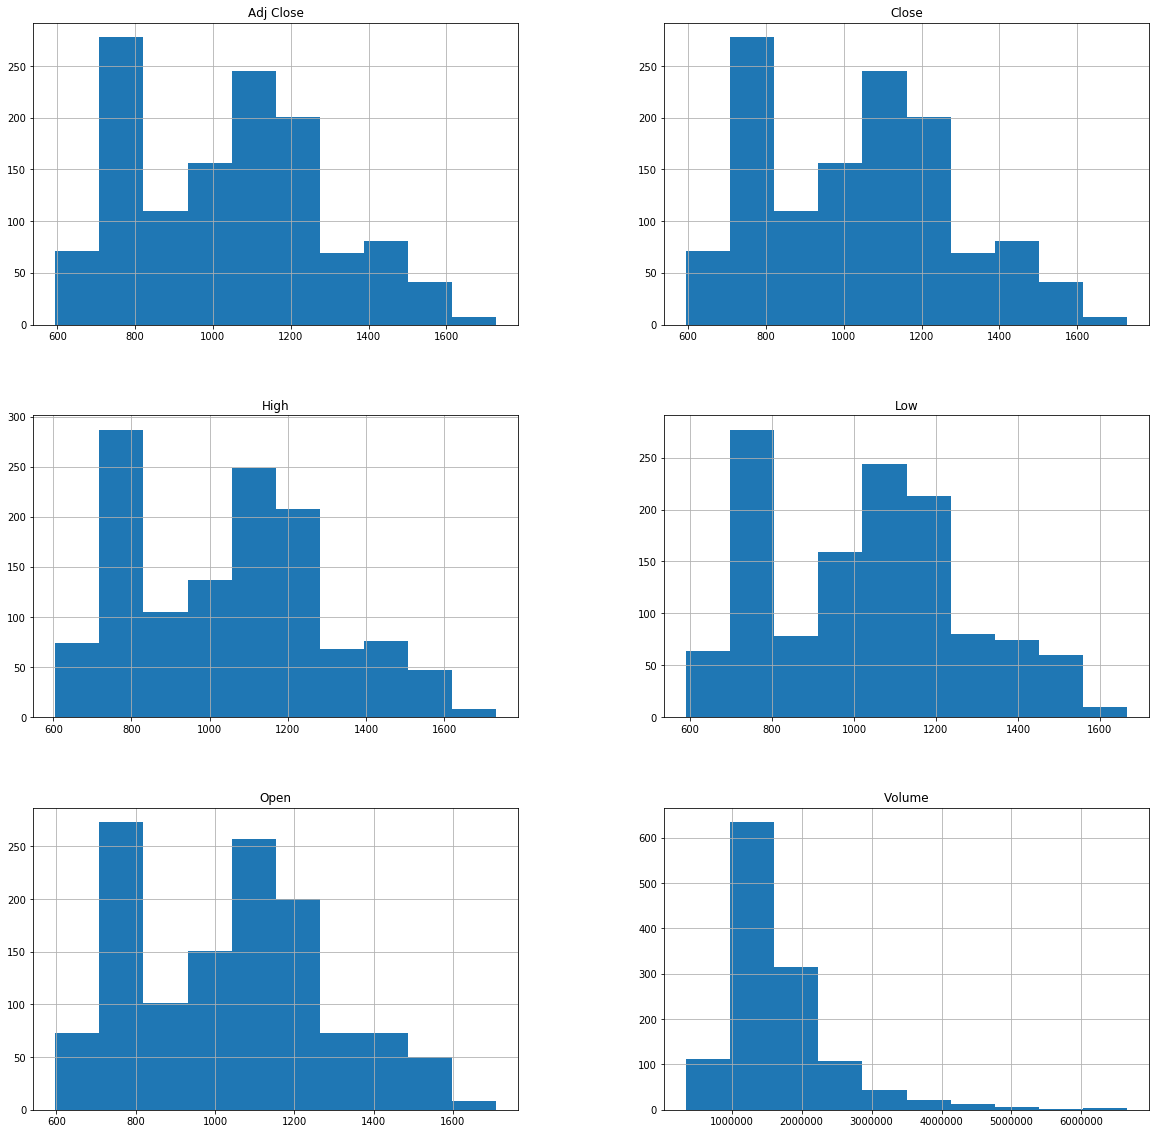

In [17]:
stock_df1.hist(figsize=(20,20))
plt.show()

In [18]:
## plot the target variable to understand how it’s shaping up in our data:

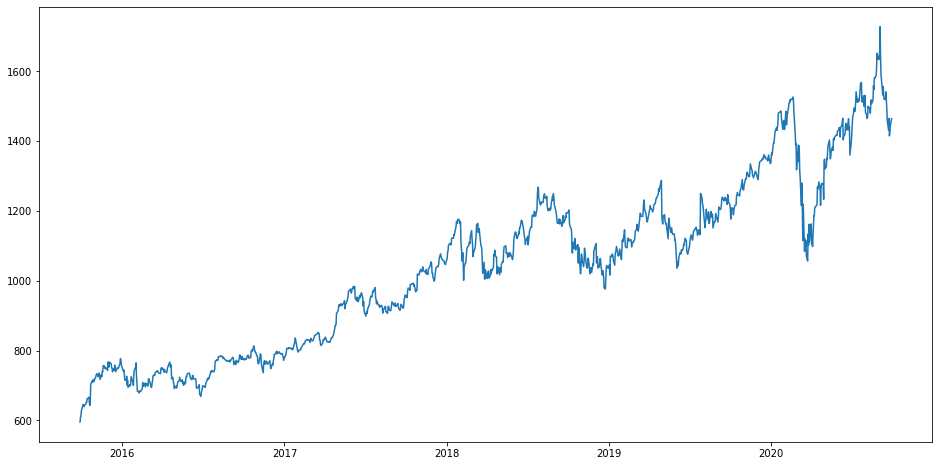

In [19]:
#setting index as date
stock_df1['Date'] = pd.to_datetime(stock_df1.Date,format='%m/%d/%Y')
stock_df1.index = stock_df1['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(stock_df1['Close'], label='Close Price history')

In [20]:
## Method1:## Predictions using Moving Average
##The predicted closing price for each day will be the average of a set of previously observed values.
##Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. 
##In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. 
## Here is a simple figure that will help you understand this with more clarity.

In [21]:
## Step1:The first step is to create a dataframe that contains only the Date and Close price columns(Target Variable), 

In [22]:
data=stock_df1.sort_index(ascending=True,axis=0)

In [23]:
## Create new dataframe
new_data=pd.DataFrame(index=range(0,len(stock_df1)),columns=['Date','Close'])

In [24]:
new_data.head()

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [25]:
## For loop
for i in range(0,len(data)):
      new_data['Date'][i] =data['Date'][i]
      new_data['Close'][i]=data['Close'][i]

In [26]:
## shape of data
new_data.shape

(1259, 2)

In [27]:
new_data.head()

,Date,Close
0,2015-09-29 00:00:00,594.97
1,2015-09-30 00:00:00,608.42
2,2015-10-01 00:00:00,611.29
3,2015-10-02 00:00:00,626.91
4,2015-10-05 00:00:00,641.47


In [28]:
## Spliiting into train(before 4 yrs data) and Validation set(last yrs data)
train=new_data[:987]
valid=new_data[987:]

In [29]:
train.shape

(987, 2)

In [30]:
len(train)

987

In [31]:
valid.shape

(272, 2)

In [32]:
## create predictions for Validation set

In [33]:
preds=[]
for i in range(0,valid.shape[0]):
     a=train['Close'][len(train)-272+i].sum()+sum(preds)
     b=a/272
     preds.append(b)

In [34]:
## Checking RMSE

In [35]:
rms=np.sqrt(np.mean(np.power(np.array(valid['Close'])-preds,2)))

In [36]:
print("/n RMS on Validation set is:")
print(rms)

/n RMS on Validation set is:
1367.0107018480533


In [37]:
## Plot to Visualise

In [38]:
valid['Predictions']=0

In [39]:
valid['Predictions']=preds

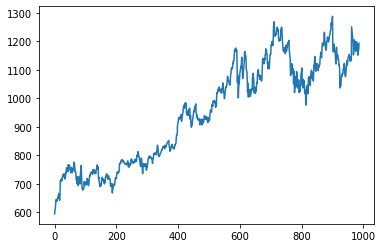

In [40]:
plt.plot(train['Close'])

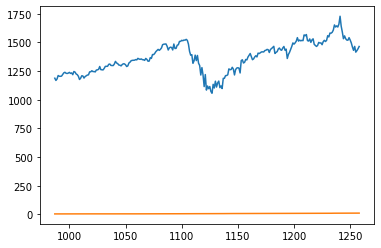

In [41]:
plt.plot(valid[['Close','Predictions']])

## INFERENCE
## RMSE 1367
## As can be infered from graph there is an increasing trend followed by slow decrease ,again gradual increase followed by decrease.
## high residual error.